In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [28]:
dfstudents = pd.read_csv('/content/drive/MyDrive/tidalhackathon/StudentsPerformance_with_headers.csv')

In [29]:
dfstudents

,STUDENT ID,Student Age,Sex,Graduated high-school type,Scholarship type,Additional work,Regular artistic or sports activity,Do you have a partner,Total salary if available,Transportation to the university,...,Preparation to midterm exams 1,Preparation to midterm exams 2,Taking notes in classes,Listening in classes,Discussion improves my interest and success in the course,Flip-classroom,Cumulative grade point average in the last semester (/4.00),Expected Cumulative grade point average in the graduation (/4.00),COURSE ID,GRADE
0,STUDENT1,2,2,3,3,1,2,2,1,1,...,1,1,3,2,1,2,1,1,1,1
1,STUDENT2,2,2,3,3,1,2,2,1,1,...,1,1,3,2,3,2,2,3,1,1
2,STUDENT3,2,2,2,3,2,2,2,2,4,...,1,1,2,2,1,1,2,2,1,1
3,STUDENT4,1,1,1,3,1,2,1,2,1,...,1,2,3,2,2,1,3,2,1,1
4,STUDENT5,2,2,1,3,2,2,1,3,1,...,2,1,2,2,2,1,2,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,STUDENT141,2,1,2,3,1,1,2,1,1,...,1,1,2,1,2,1,3,3,9,5
141,STUDENT142,1,1,2,4,2,2,2,1,4,...,1,1,3,2,2,1,5,3,9,5
142,STUDENT143,1,1,1,4,2,2,2,1,1,...,1,1,3,3,2,1,4,3,9,1
143,STUDENT144,2,1,2,4,1,1,1,5,2,...,2,1,2,1,2,1,5,3,9,4


In [30]:
dfstudents.columns

Index(['STUDENT ID', 'Student Age', 'Sex', 'Graduated high-school type',
       'Scholarship type', 'Additional work',
       'Regular artistic or sports activity', 'Do you have a partner',
       'Total salary if available', 'Transportation to the university',
       'Accommodation type in Cyprus', 'Mother’s education',
       'Father’s education ', 'Number of sisters/brothers', 'Parental status',
       'Mother’s occupation', 'Father’s occupation', 'Weekly study hours',
       'Reading frequency', 'Reading frequency.1',
       'Attendance to the seminars/conferences related to the department',
       'Impact of your projects/activities on your success',
       'Attendance to classes', 'Preparation to midterm exams 1',
       'Preparation to midterm exams 2', 'Taking notes in classes',
       'Listening in classes',
       'Discussion improves my interest and success in the course',
       'Flip-classroom',
       'Cumulative grade point average in the last semester (/4.00)',
       '

In [31]:
allColumns = ['STUDENT ID', 'Student Age', 'Sex', 'Graduated high-school type',
       'Scholarship type', 'Additional work',
       'Regular artistic or sports activity', 'Do you have a partner',
       'Total salary if available', 'Transportation to the university',
       'Accommodation type in Cyprus', 'Mother’s education',
       'Father’s education ', 'Number of sisters/brothers', 'Parental status',
       'Mother’s occupation', 'Father’s occupation', 'Weekly study hours',
       'Reading frequency', 'Reading frequency.1',
       'Attendance to the seminars/conferences related to the department',
       'Impact of your projects/activities on your success',
       'Attendance to classes', 'Preparation to midterm exams 1',
       'Preparation to midterm exams 2', 'Taking notes in classes',
       'Listening in classes',
       'Discussion improves my interest and success in the course',
       'Flip-classroom',
       'Cumulative grade point average in the last semester (/4.00)',
       'Expected Cumulative grade point average in the graduation (/4.00)',
       'COURSE ID', 'GRADE']

columnsToKeep = ['Mother’s education', 'Parental status', 'Student Age', 'Additional work', 'Regular artistic or sports activity', 'Do you have a partner', 'Number of sisters/brothers', 'Weekly study hours', 'Reading frequency', 'Reading frequency.1', 'Attendance to the seminars/conferences related to the department', 'Attendance to classes', 'Preparation to midterm exams 1', 'Preparation to midterm exams 2', 'Taking notes in classes', 'Listening in classes', 'GRADE']
columnsToKeepSet = set(columnsToKeep)
targetVariable = 'GRADE'

In [32]:
def remove_unneeded_columns(df, columnsToKeepSet):
  columns_to_remove = [col for col in df.columns if col not in columnsToKeepSet]
  df.drop(columns_to_remove, axis=1, inplace=True)

  return df

dfstudentsClean = remove_unneeded_columns(dfstudents, columnsToKeepSet)

dfstudentsClean

,Student Age,Additional work,Regular artistic or sports activity,Do you have a partner,Mother’s education,Number of sisters/brothers,Parental status,Weekly study hours,Reading frequency,Reading frequency.1,Attendance to the seminars/conferences related to the department,Attendance to classes,Preparation to midterm exams 1,Preparation to midterm exams 2,Taking notes in classes,Listening in classes,GRADE
0,2,1,2,2,1,3,1,3,2,2,1,1,1,1,3,2,1
1,2,1,2,2,2,2,1,2,2,2,1,1,1,1,3,2,1
2,2,2,2,2,2,2,1,2,1,2,1,1,1,1,2,2,1
3,1,1,2,1,1,5,1,3,1,2,1,1,1,2,3,2,1
4,2,2,2,1,3,2,1,2,1,1,1,1,2,1,2,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,2,1,1,2,1,2,2,3,3,2,1,1,1,1,2,1,5
141,1,2,2,2,1,5,1,3,2,2,2,2,1,1,3,2,5
142,1,2,2,2,3,4,1,2,2,2,1,1,1,1,3,3,1
143,2,1,1,1,4,1,1,2,2,1,1,1,2,1,2,1,4


In [33]:
def create_scatterplots_against_target(df, targetVariable):
  # create scatterplots with single feature on the x axis, target feature on the y axis
  # color the datapoints by their x-value.

  # Number of features excluding the target variable
  n_features = df.shape[1] - 1

  # Setting up the subplot grid
  nrows = n_features // 3 + (n_features % 3 > 0)
  fig, axs = plt.subplots(nrows=nrows, ncols=3, figsize=(15, nrows * 5))

  # Flattening the axis array for easy iteration
  axs = axs.flatten()

  # Counter for the subplot index
  plot_index = 0

  for column in df.columns:
      if column != targetVariable:
          sns.scatterplot(data=df, x=column, y=targetVariable, ax=axs[plot_index], palette="viridis")
          axs[plot_index].set_title(f'Scatter plot of {column} vs {targetVariable}')
          plot_index += 1

          # Hide any unused subplots
          if plot_index == n_features:
              for i in range(plot_index, len(axs)):
                  axs[i].axis('off')
              break

  # Adjust layout
  plt.tight_layout()
  plt.show()

<ipython-input-33-75d64b835ecc>:20: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=df, x=column, y=targetVariable, ax=axs[plot_index], palette="viridis")
<ipython-input-33-75d64b835ecc>:20: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=df, x=column, y=targetVariable, ax=axs[plot_index], palette="viridis")
<ipython-input-33-75d64b835ecc>:20: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=df, x=column, y=targetVariable, ax=axs[plot_index], palette="viridis")
<ipython-input-33-75d64b835ecc>:20: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=df, x=column, y=targetVariable, ax=axs[plot_index], palette="viridis")
<ipython-input-33-75d64b835ecc>:20: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=df, x=column, y=targetVariable, ax=a

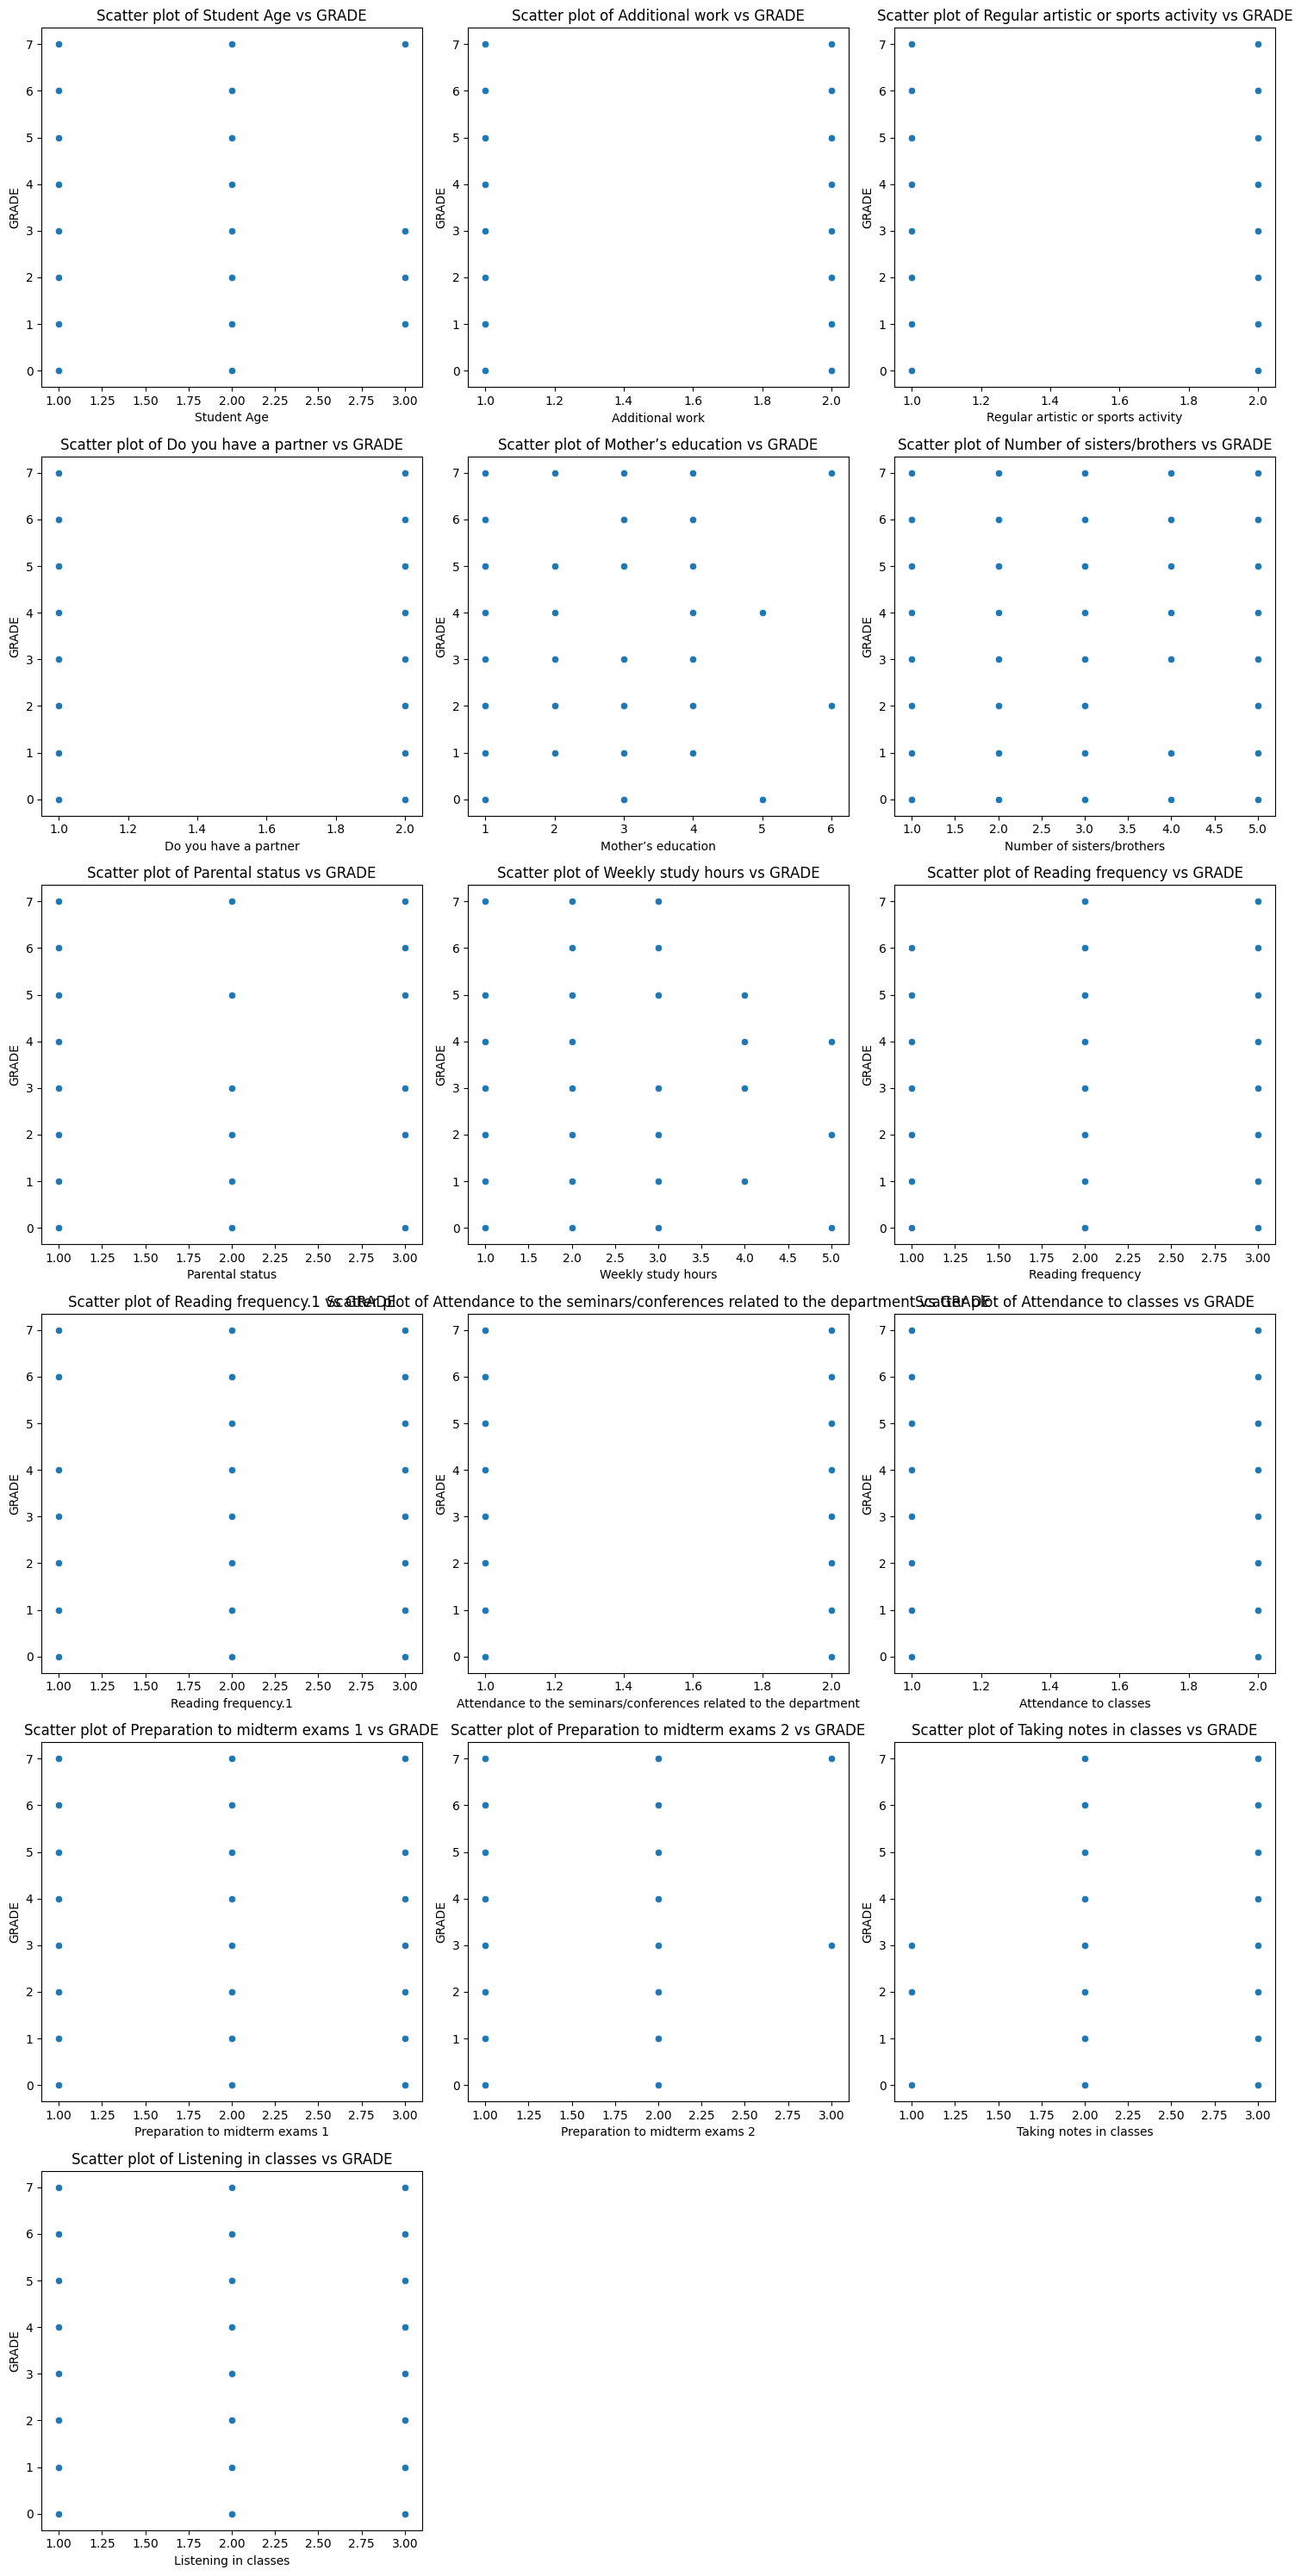

In [34]:
create_scatterplots_against_target(dfstudentsClean, targetVariable)

In [35]:
def create_barcharts_of_cat_feature_counts_to_target_val(df, targetVariable):
  # List of all features excluding the target variable
  features = [col for col in df.columns if col != targetVariable]

  # Creating bar charts for each feature
  for feature in features:
    # Create a crosstab
    crosstab = pd.crosstab(df[targetVariable], df[feature])

    # Plotting
    crosstab.plot(kind='bar', stacked=False, figsize=(10, 6))

    # Plot settings
    plt.title(f'Count of {feature} for each {targetVariable}')
    plt.xlabel(targetVariable)
    plt.ylabel('Count')
    plt.xticks(rotation=0)
    plt.legend(title=feature)
    plt.show()

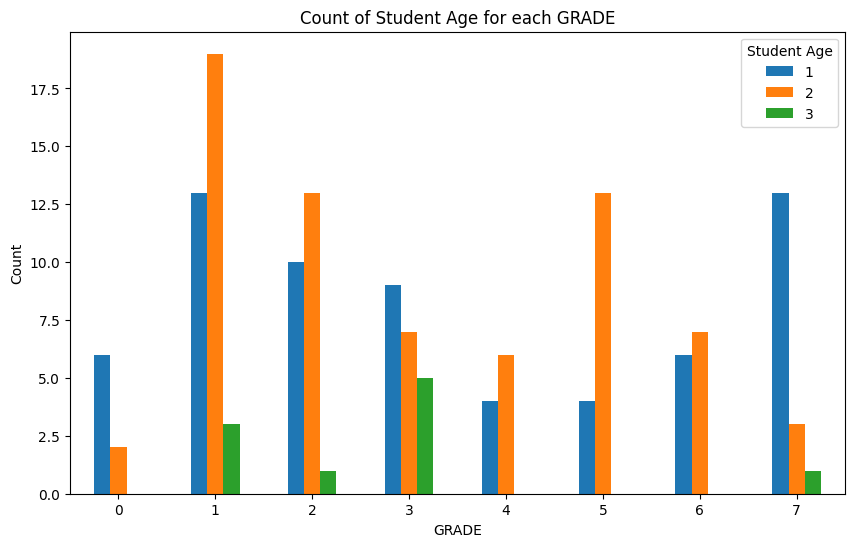

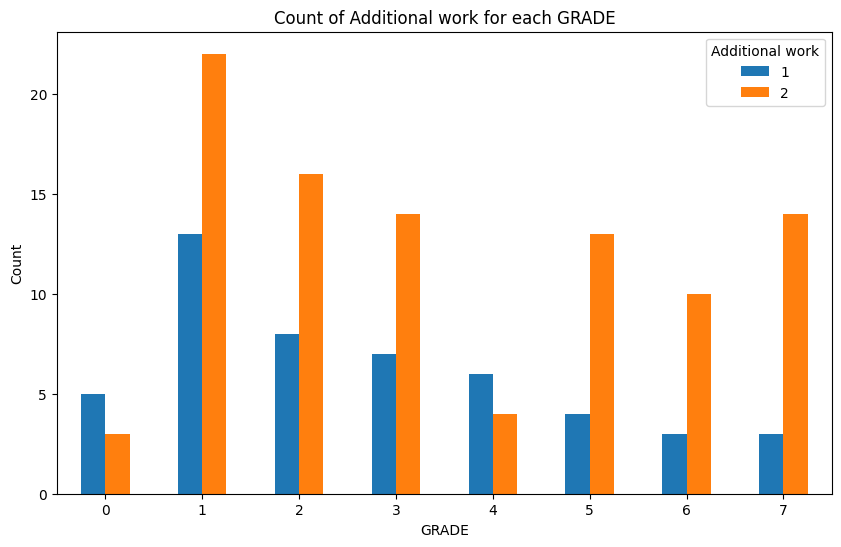

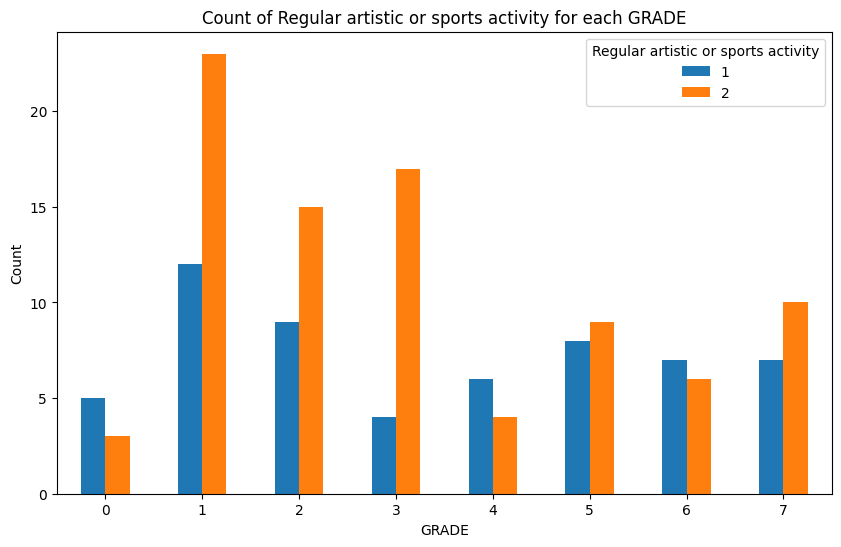

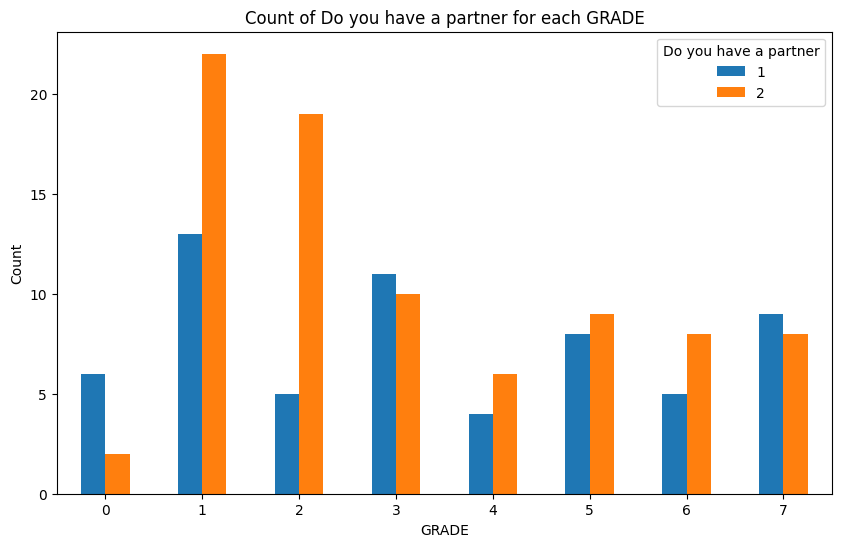

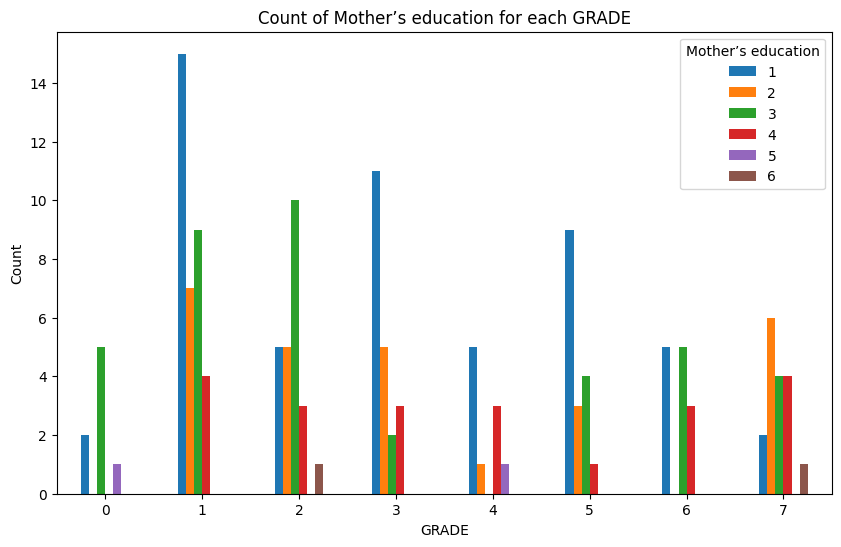

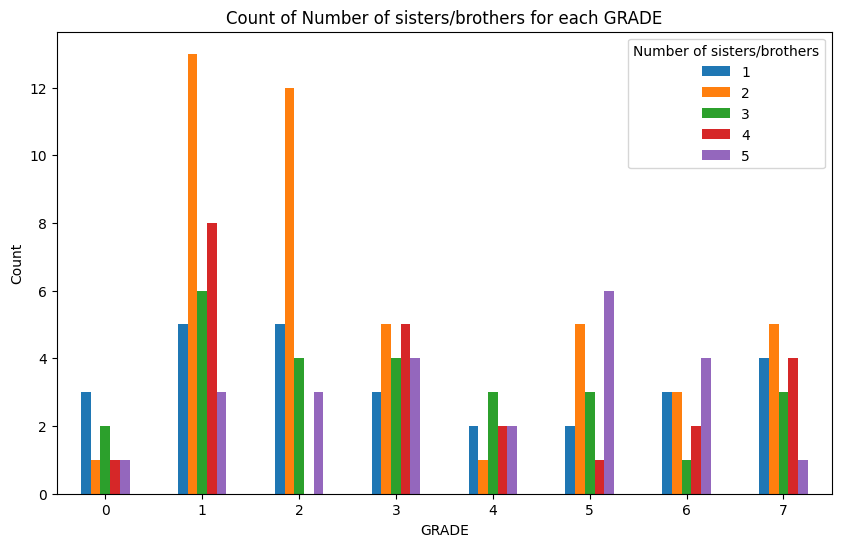

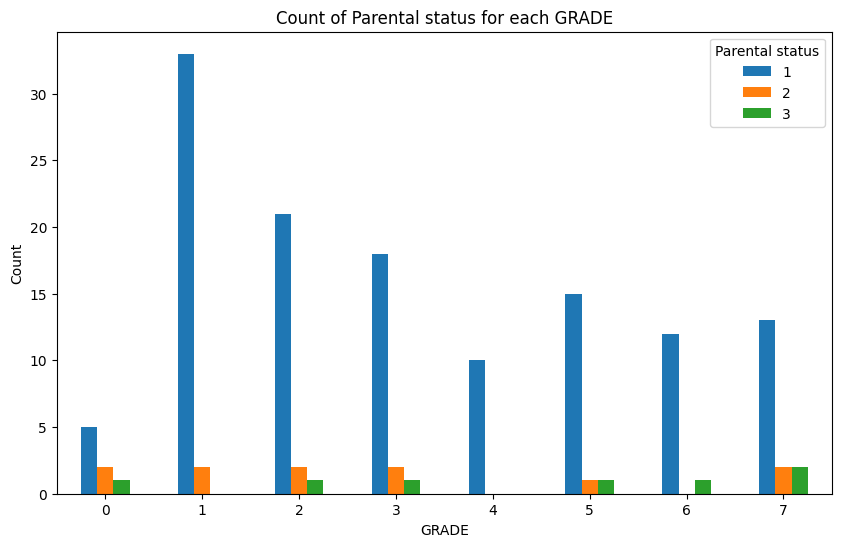

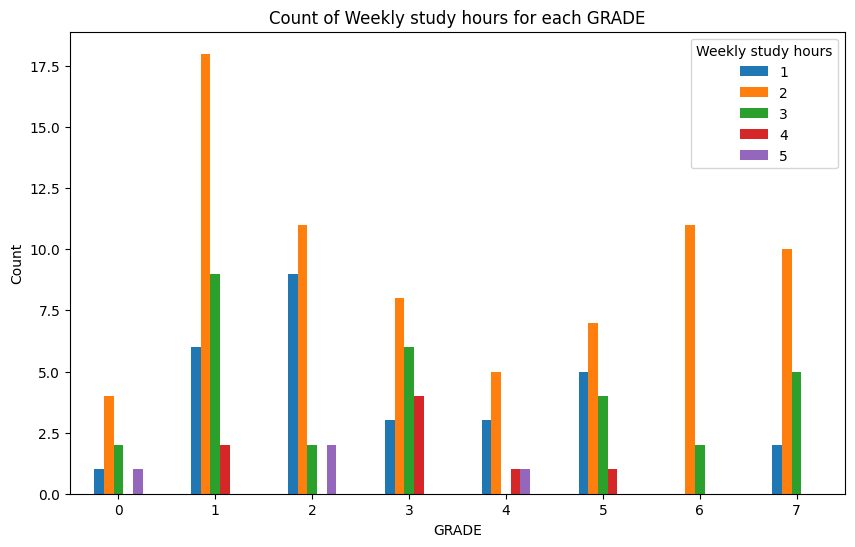

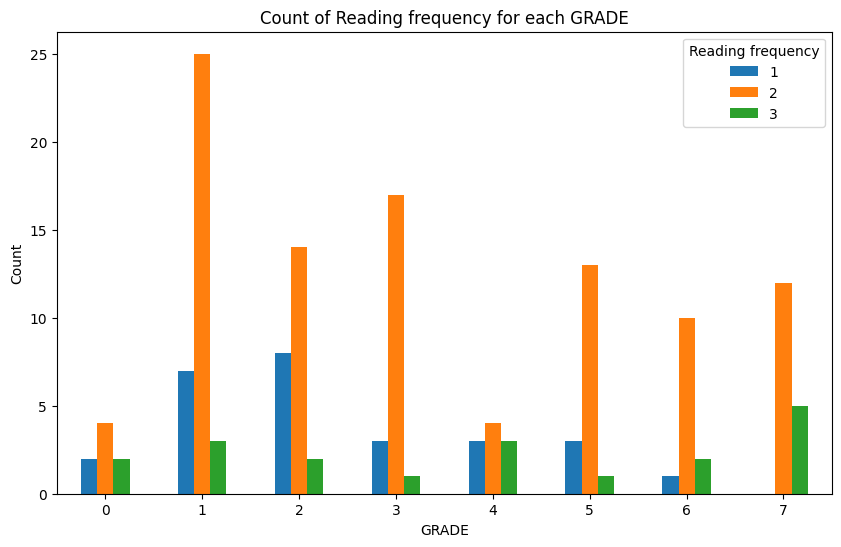

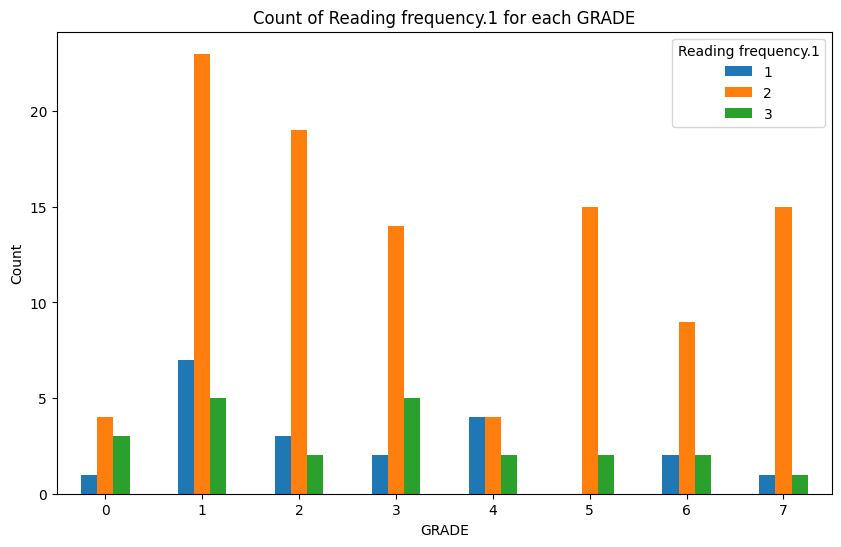

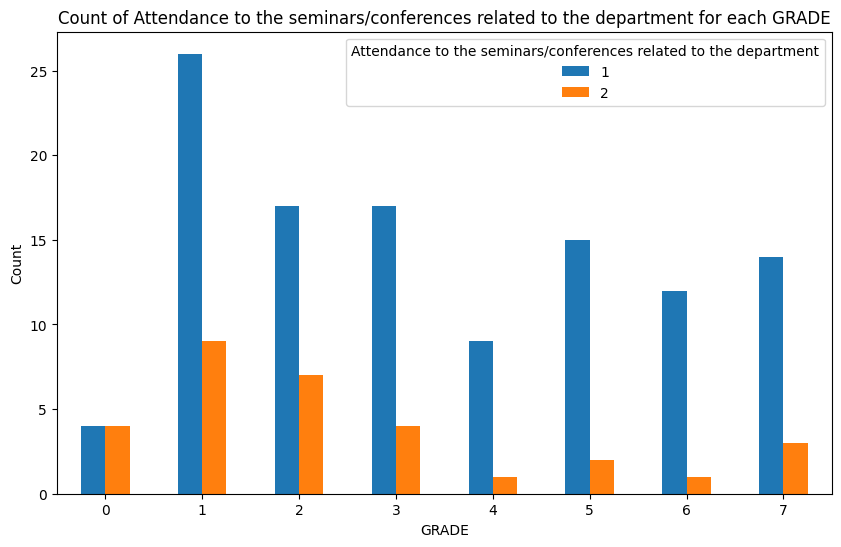

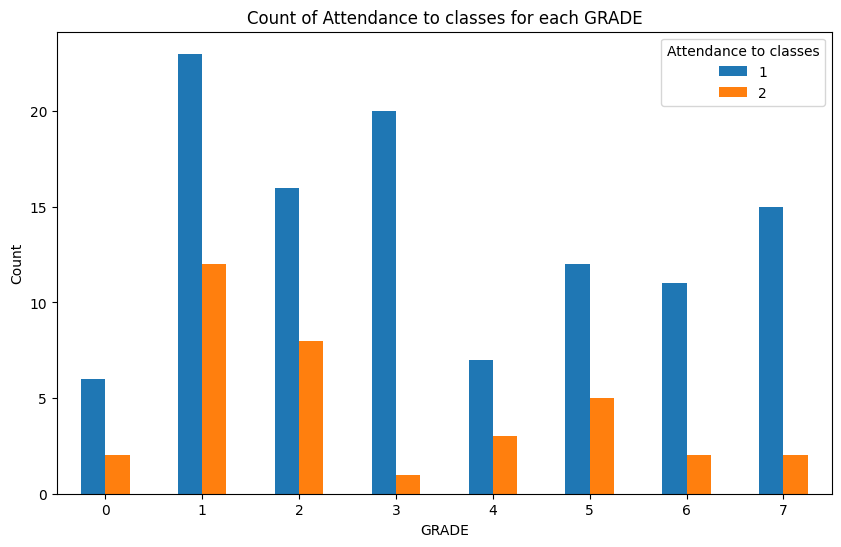

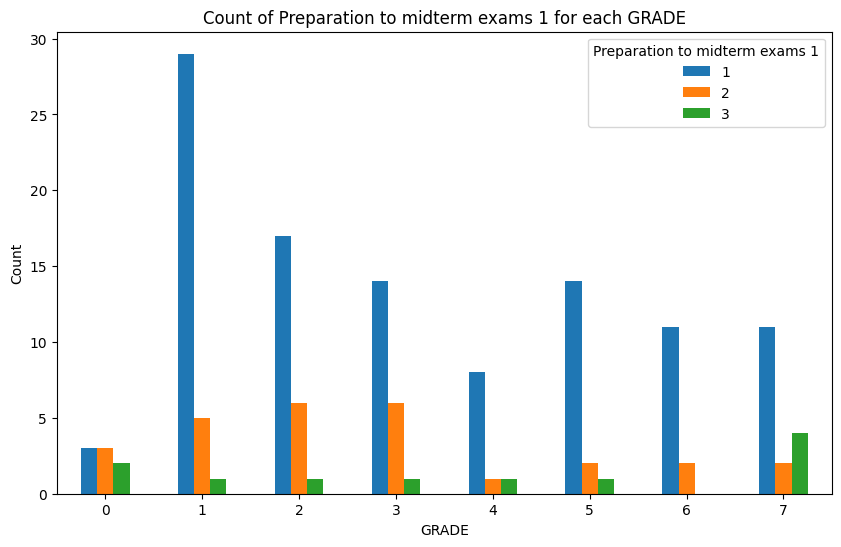

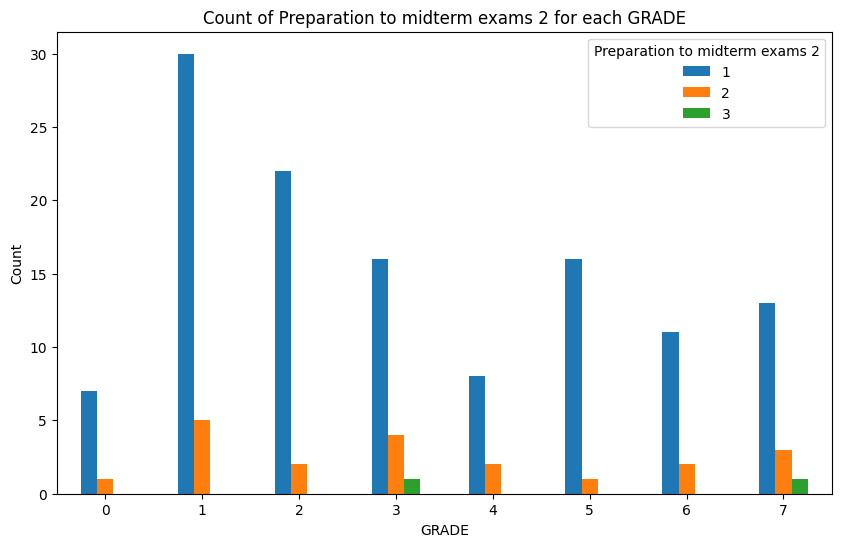

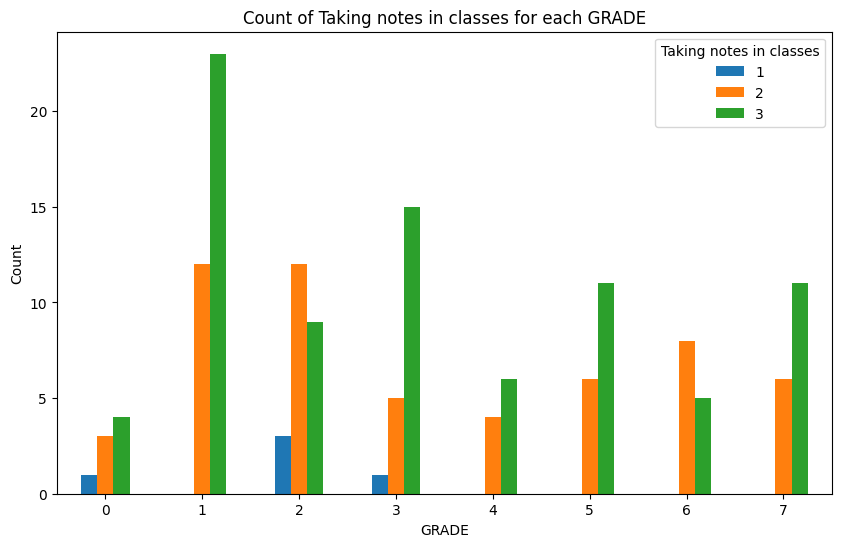

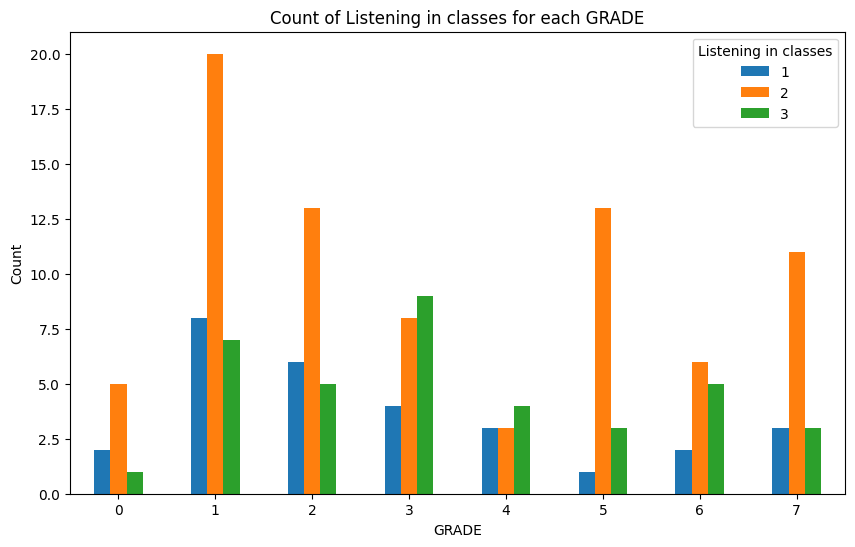

In [36]:
create_barcharts_of_cat_feature_counts_to_target_val(dfstudentsClean, targetVariable)

In [37]:
def create_boxplots_featurex_targety(df, targetVariable):
  # Convert target variable to numeric if it's not already
  df[targetVariable] = pd.to_numeric(df[targetVariable], errors='coerce')

  # List of all features excluding the target variable
  features = [col for col in df.columns if col != targetVariable]

  # Creating box plots for each feature
  for feature in features:
    # Plotting
    sns.boxplot(x=df[feature], y=df[targetVariable])

    # Plot settings
    plt.title(f'Box plot of {targetVariable} vs {feature}')
    plt.xlabel(feature)
    plt.ylabel(targetVariable)
    plt.xticks(rotation=45)
    plt.show()

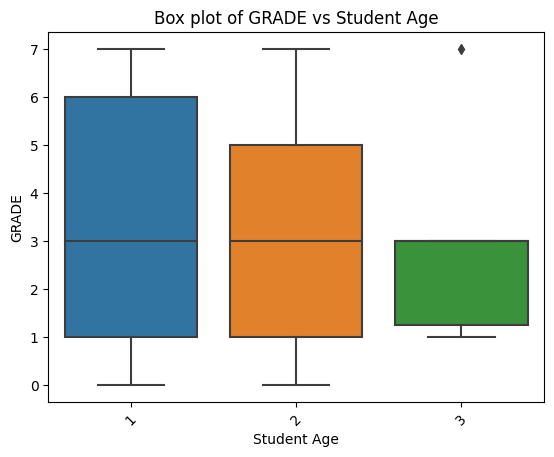

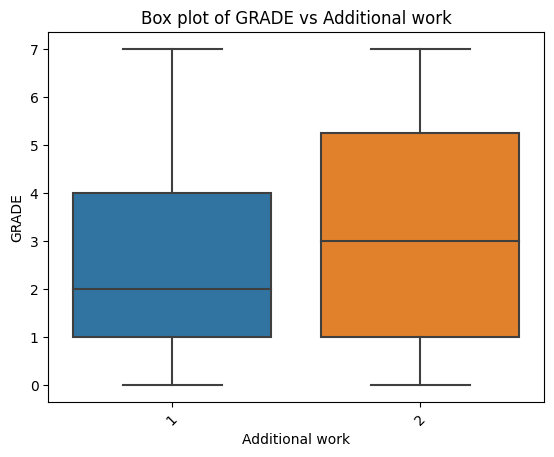

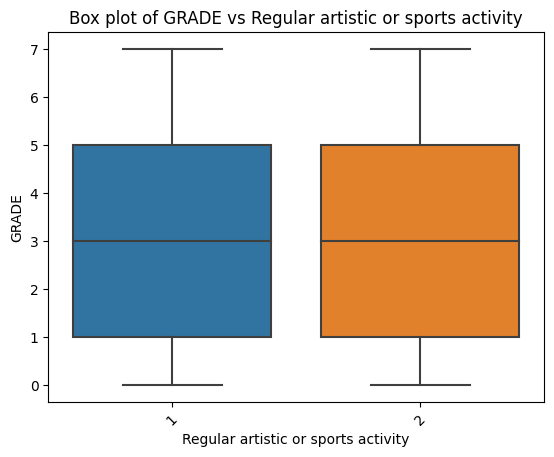

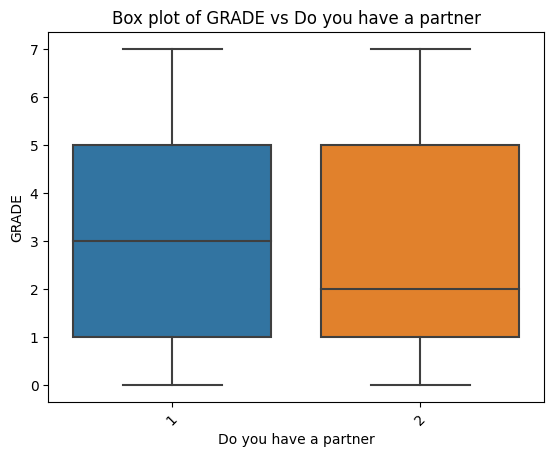

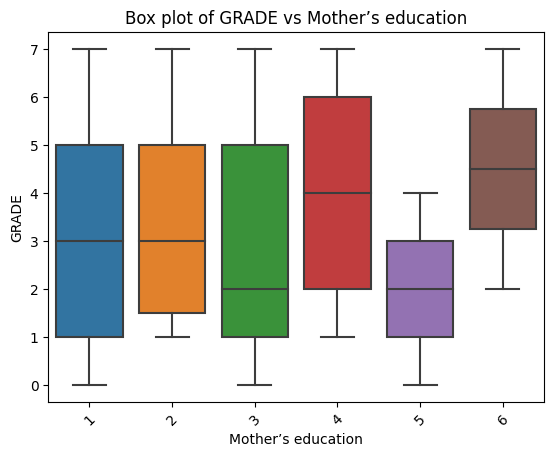

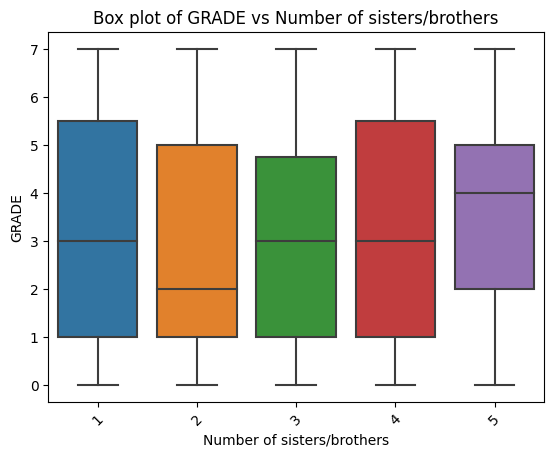

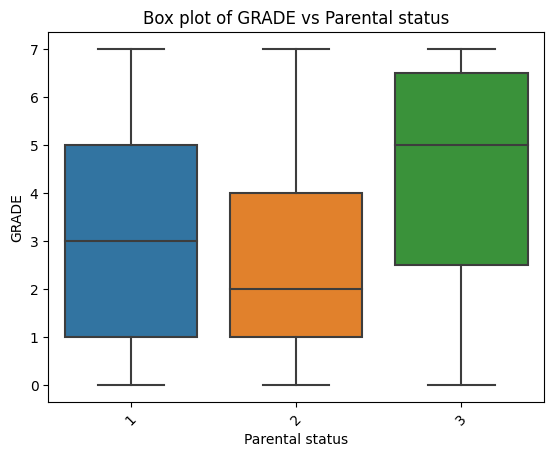

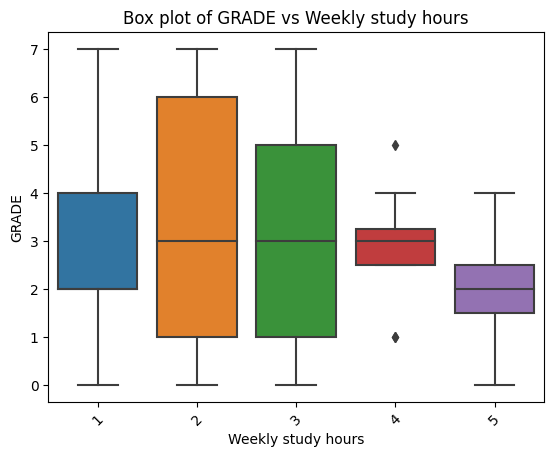

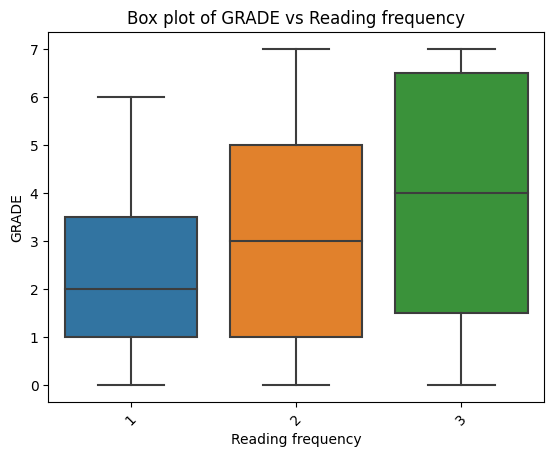

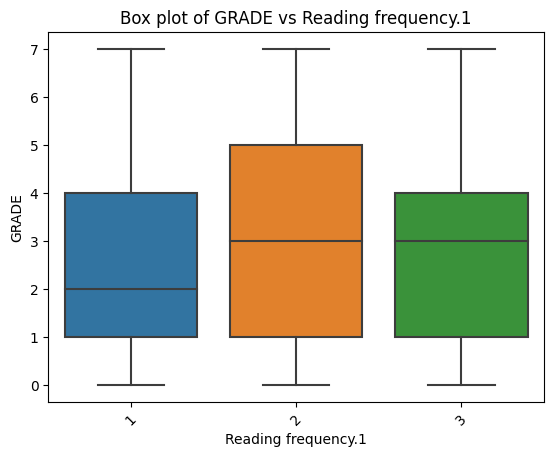

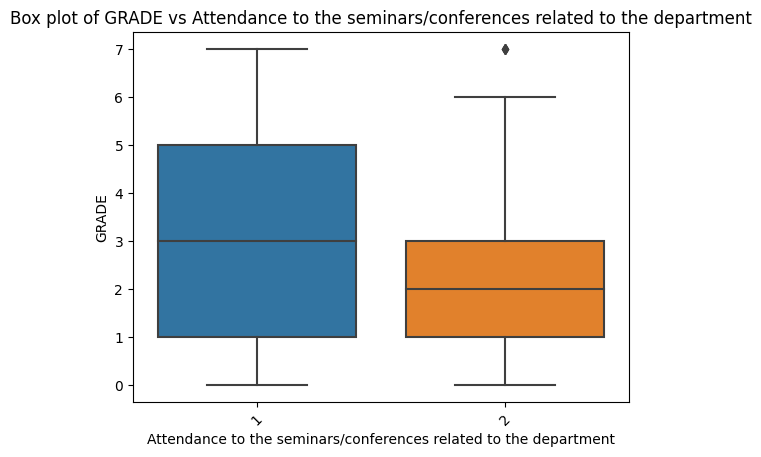

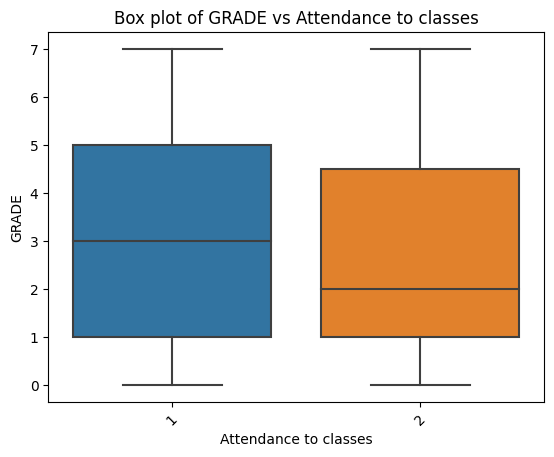

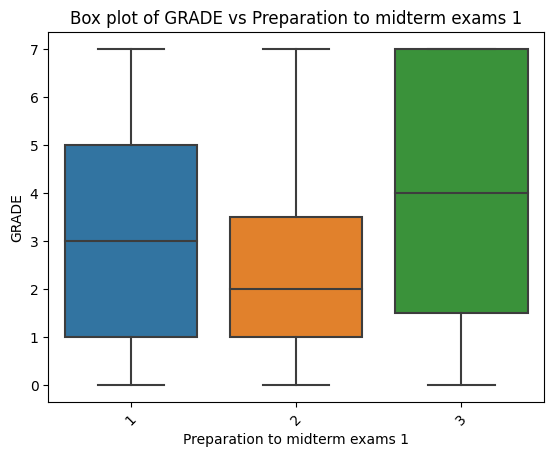

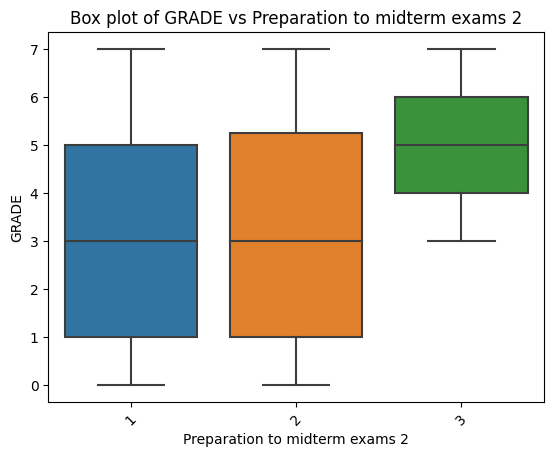

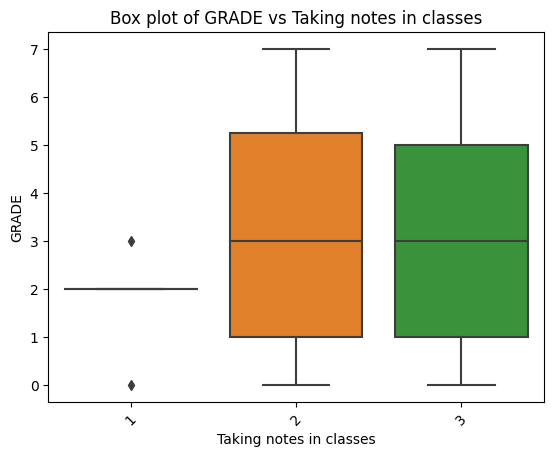

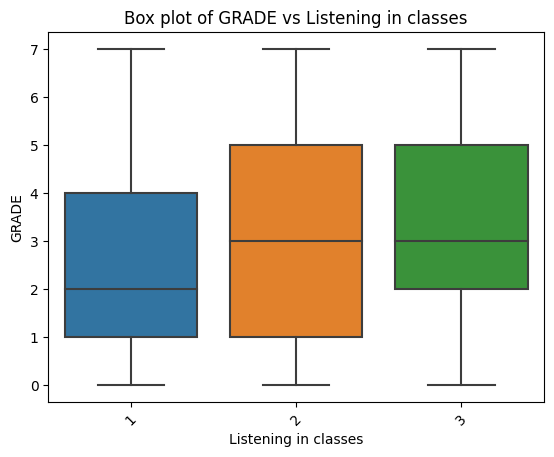

In [38]:
create_boxplots_featurex_targety(dfstudentsClean, targetVariable)
# TODO
# create new variable - totalreading and see if it correlates with higher grades